<a href="https://colab.research.google.com/github/BarnabasLim/Tensorflow/blob/main/TimeSeries_Prediction_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__Time Series Prediction__


*   Univariate Time Series (Price Vs Time)
  - Time Series that have a single value at each time step



*   Multivariate Time Series (Birth rate and Death Rate Vs time)
  - Time series that have multiple values at each time step.
  - Helps in understanding impact of related Data.	

	
##__Machine learning applied to time series.__
	

*   Forecast/ Prediction
*   Imputation
*   Anomaly Detection
*   Pattern Recognition
	
##__Building blocks / Patterns in time series__
*  __Stationary time series__ are time series that has behavior that does not change over time. If time series is stationary, the more data you have the better.
$$TimeSeries=Trend+Seasonality+Autocorrelation+Noise$$
<table>
<tr>
<th>Patterns</th>
<th>Descriptions</th>
</tr>
<tr>
<td>Trends </td>
<td>Specific general direction of overall time series</td>
</tr>
<tr>
<td>Seasonality</td>
<td> Repeating patterns at regular intervals</td>
</tr>
<tr>
<td>Autocorrelation</td>
<td>- Time Series like this are often described as having memory as steps are dependent on previous ones<br>
    - Correlates with a delayed copy of itself.<br>
    - (e.g., past data at timestamp t-1 helps to predict data at t
  $$v(t)=0.99v(t-1)$$</td>
</tr>
<tr>
<td>Noise</td>
<td>Non-Predictable Random Values</td>
</tr>
<tr>
<td>Innovations</td>
<td>Unpredictable Spikes</td>
</tr>
</table>


 
*  __Non-Stationary time series__ are series such as stock price that may break trend due to a big financial crisis or a big scandal or a disruptive technological breakthrough. Non-Stationary time series would mean that the optimal time window for training would vary.




# __Generating Sequences using Python__
Adapted from Coursera Sequences, Time Series and Prediction
Week 1
Introduction to time series notebook

In [90]:
!pip install -U tf-nightly-2.0-preview

ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


In [91]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [92]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    #Function for plotting time series
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

##__1. Trend__

In [93]:
def trend(time, slope=0):
    return slope * time


##__2. Seasonality__

In [94]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""

    #if season is less than 0.4
    #       cos(2*season_time*np.pi)
    #else
    #       1/exp^(3*season_time)
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    
    #Returns Phase in season=(remainder when divided by period)/period
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

##__3. Noise__
<hr>
In practice few real-life time series have such a smooth signal. They usually have some noise, and the signal-to-noise ratio can sometimes be very low. Let's generate some white noise:

In [95]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

Generating Time series

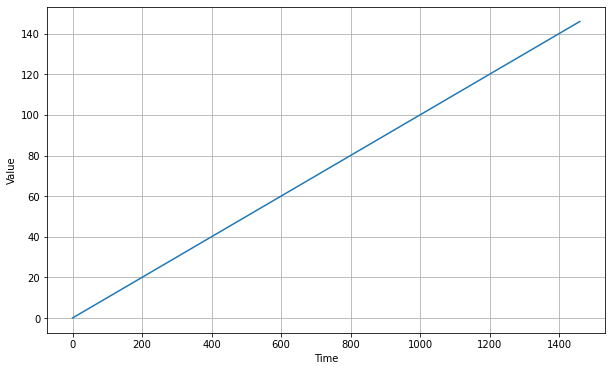

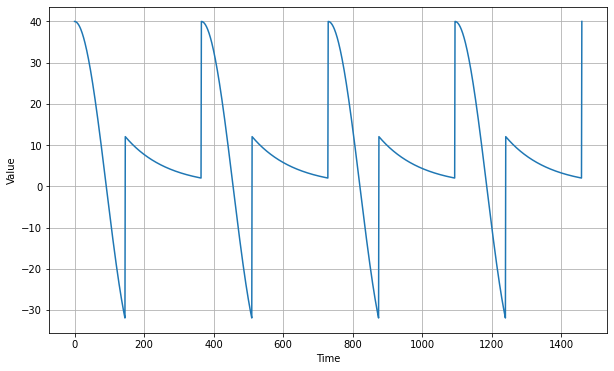

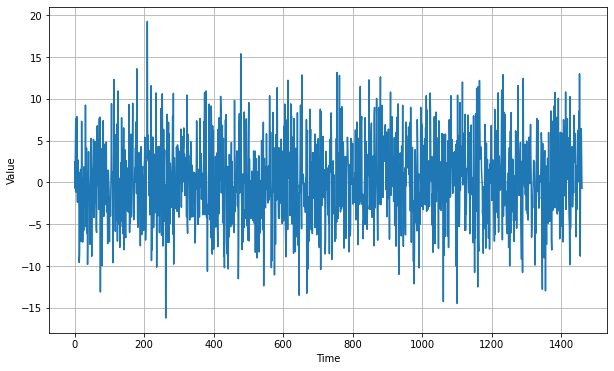

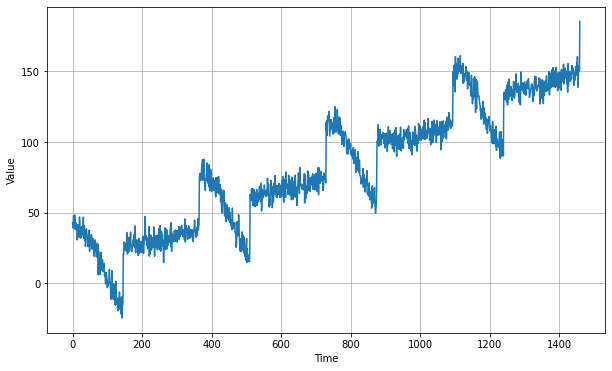

In [96]:
#Example 1: Time Series w Trends upwards
# Create np array of 4 years  
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

#Example 2: Time Series w Seasonality
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

#Example 3: Time Series w Noise
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

#Example 4: Time Series w Sesonality+Noise+ Trend
series += noise+ trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

##__4.Autocorrelation__
Note these are specific autocorrelation functions with random numbers as inputs<br>
In the later sections there are generalised autocorrelation functions 
<hr>
$$V=0.5V(t-50)-0.1V(t-33), where V(0<t<50)=100$$

In [97]:
def autocorrelation(time, amplitude, seed=None):
    #input 
    rnd = np.random.RandomState(seed)
    φ1 = 0.5
    φ2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    plot_series(time[:200], ar[:200])
    plt.show()
    for step in range(50, len(time) + 50):
        ar[step] += φ1 * ar[step - 50]
        ar[step] += φ2 * ar[step - 33]
    return ar[50:] * amplitude

$$V=0.8V(t-1) , where V(0<t<50)=100$$

In [98]:
def autocorrelation1(time, amplitude, seed=None):
    #input 
    rnd = np.random.RandomState(seed)
    φ = 0.8
    ar = rnd.randn(len(time) + 1)
    #ar[0] = 100
    for step in range(1, len(time) + 1):
        ar[step] += φ * ar[step - 1]
    return ar[1:] * amplitude

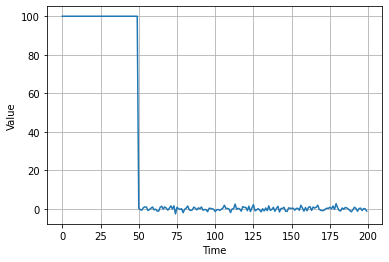

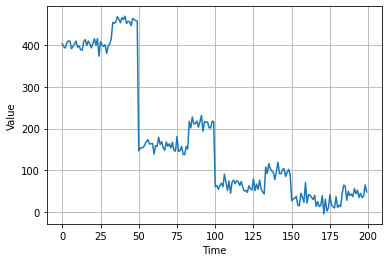

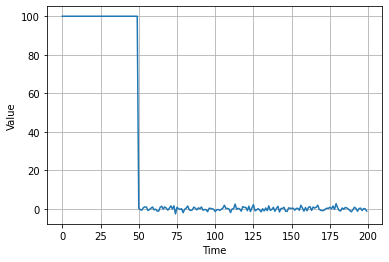

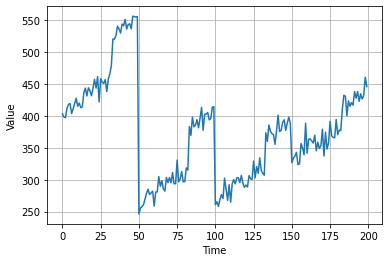

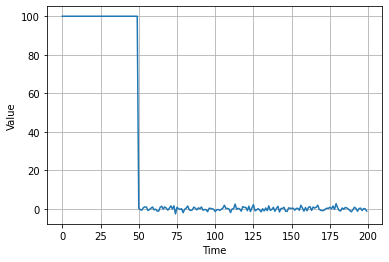

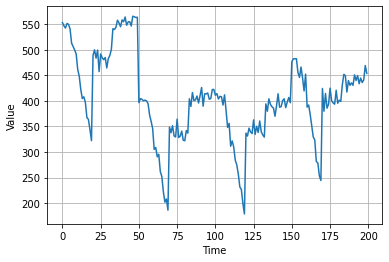

In [99]:
#Example 1: autocorrelation only
series = autocorrelation(time, 10, seed=42)
plot_series(time[0:200], series[0:200])
plt.show()

#Example 2: autocorrelation only
series = autocorrelation(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

#Example 3: autocorrelation + Seasonality + Trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

In [100]:
#Innovations : Random Spikes
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    #Randomly select 10 index from time series where impluse will happen 
    impulse_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    #For each selected index generate random impluse of random amplitude
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude
    return series  

$$V=φ_{0}*V(t-lag_{0})+φ_{1}*V(t-lag_{1})+φ_{2}*V(t-lag_{2})+...+φ_{n}*V(t-lag_{n})$$

---



In [101]:
def autocorrelation(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
              ar[step] += φ * ar[step - lag]
    #plot_series(time[:200], ar[:200])
    #plt.show()
    return ar

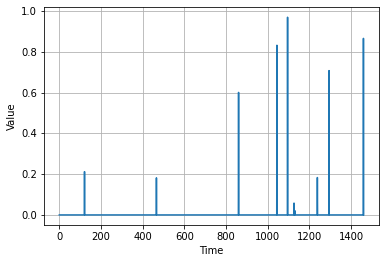

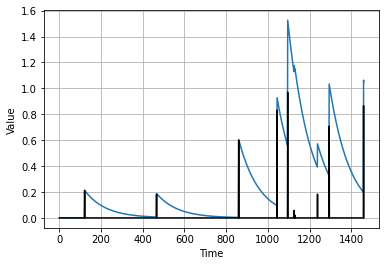

In [102]:
#input
signal = impulses(time, 10, seed=42)
plot_series(time, signal)
plt.show()

series = autocorrelation(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

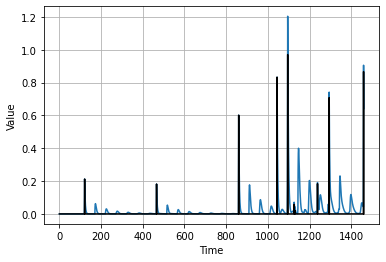

In [103]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.70, 50: 0.2})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

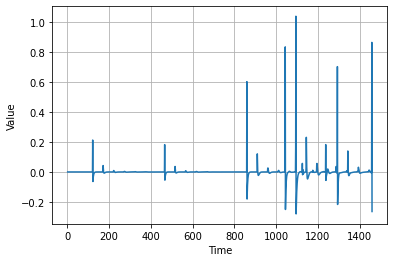

In [104]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

##__5. Non Stationary Time Series__

Non-Stationary time series are series such as stock price that may break trend due to a big financial crisis or a big scandal or a disruptive technological breakthrough. 

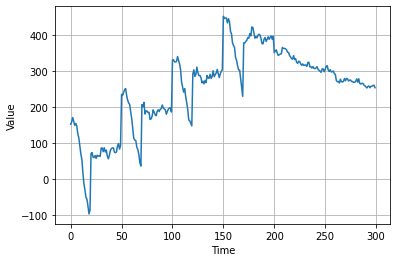

In [107]:
#Non Stationary Time Series 
# t<200, 
# Series 1=autocorrelation + Seasonality + Trend
# t>200, 
#Series 2=autocorrelation + Seasonality + Trend
series = autocorrelation1(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation1(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
#series += noise(time, 30)
plot_series(time[:300], series[:300])
plt.show()

#Forcasting Using Statistical Methods
<hr>


##Step 1: Generate Time Series Sequences

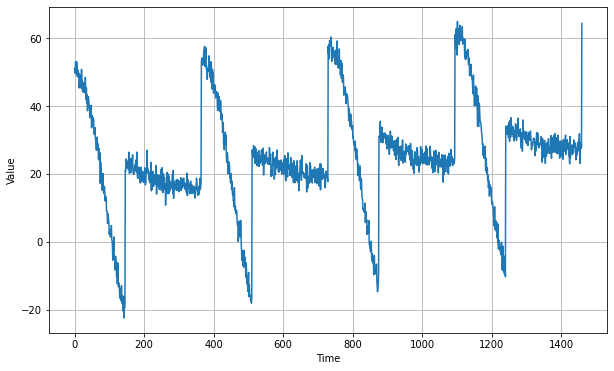

In [109]:
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Step 2: Split data into Training and Validation<hr>

<table>
<tr>
<th>Data Set</th>
<th>Range</th>
</tr>
<tr>
<td>Train data </td>
<td>index 0:1099</td>
</tr>
<tr>
<td>Validation data</td>
<td> index 1100:1461</td>
</tr>

</table>

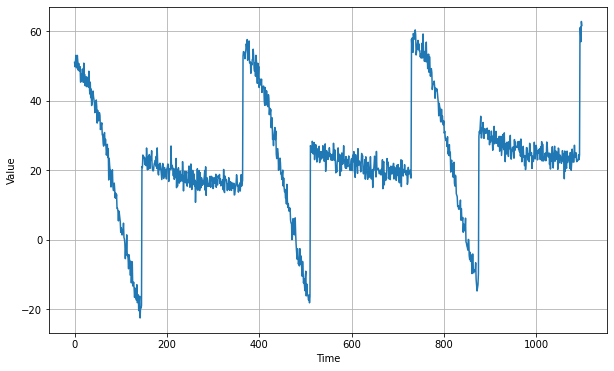

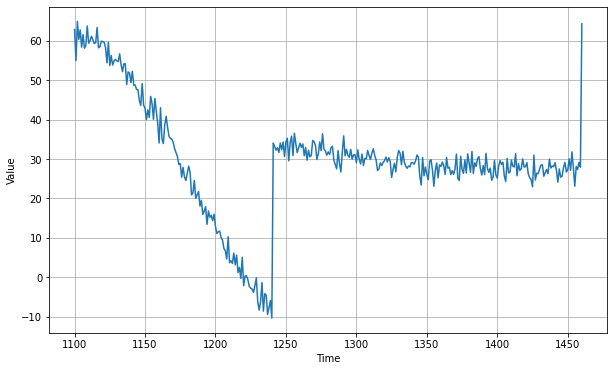

In [111]:
split_time = 1100
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

## Step 3.1: Naive Forecasting<hr>
$$V_p(t)=V(t-1)$$

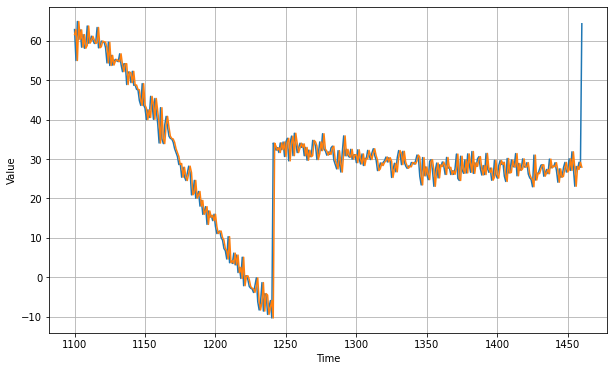

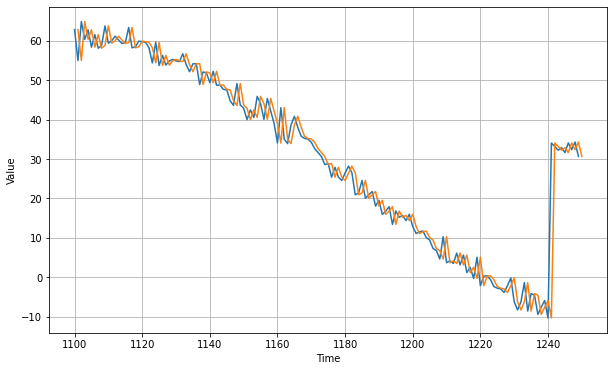

In [113]:
naive_forecast = series[split_time - 1:-1]

#Displays Overall Validation and Forecast Data
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

#Displays Subsection of validation data and Forecast Data
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

##Step 3.2: Evaluate Forcast
<hr>
<table>
<tr>
<th>Name</th>
<th>Psuedo Code</th>
<th>Formula</th>
<th>Notes</th>
</tr>
<tr>
<td>error  </td>
<td>Error= forecast-actual</td>
<td>$$Error=forcast-actual$$</td>
<td>  </td>
</tr>
<tr>
<td>Mean square error  </td>
<td>Mse=np.square(errors).mean()</td>
<td>$$MSE=1/n ∑_{i=1}^{n}(y_pi-y_i )^2 $$</td>
<td> Penalizes large error </td>
</tr>
<tr>
<td>Mean absolute error  </td>
<td>Mae=np.abs(errors).mean()</td>
<td>$$MAE=1/n ∑_{i=1}^{n}|y_pi-y_i | $$</td>
<td>  </td>
</tr><tr>
<td>Mean absolute percentage error  </td>
<td>Mape=np.abs(errors/x_valid).mean()</td>
<td>$$MAE=1/n ∑_{i=1}^{n}(y_{pi}-y_i)/(y_i)$$</td>
<td>  </td>
</tr>
</table>

In [114]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

17.78532
2.5545282


## Step 4.1: Moving Average Forecast

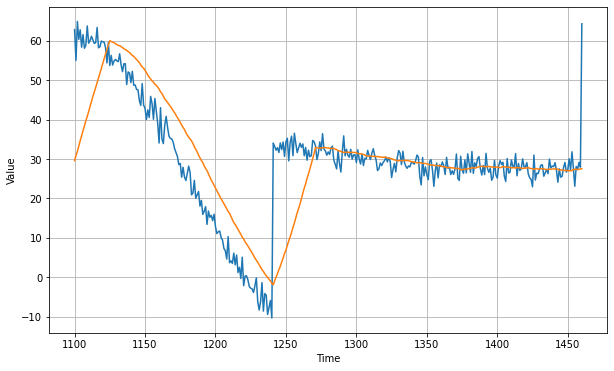

In [115]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)


moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

## Steo 4.2 Evaluate Moving Average Forecast

In [ ]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

## Step 5.1: Differentence <hr>

$$Forecast= trailing\,moving\,average\,of\,differenced\,series + series(t-365)$$

Using Differencing, remove trend and seasonality by subtracting __current season time series__ from __previous season time series__

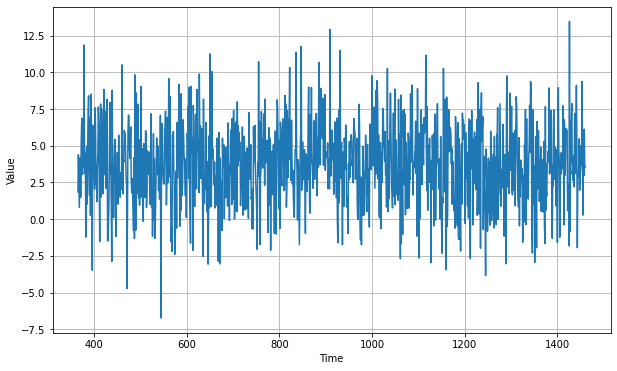

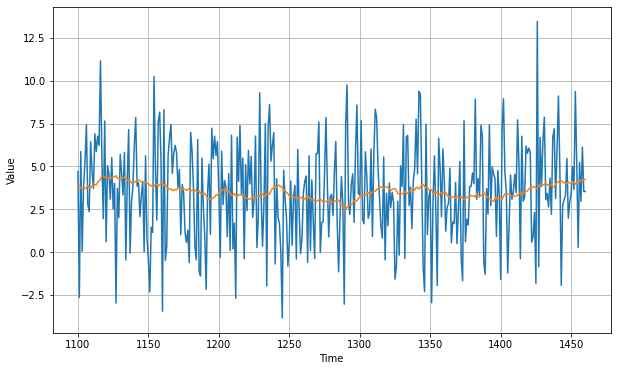

In [117]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

## Step 5.2: Add back trend and seasonality 
<hr>
by adding the past values from t – 365:

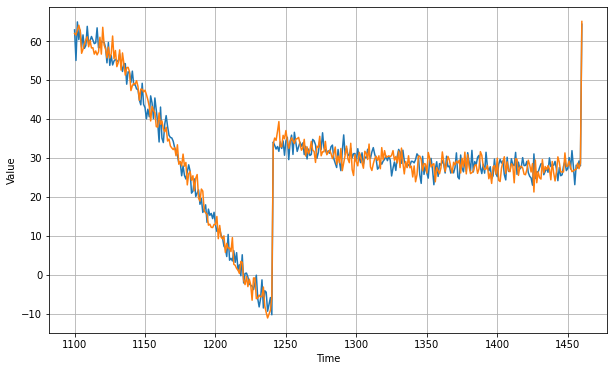

In [118]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

##Step 5.3: Evaluate Forecast

In [ ]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

##Step 5.4: Add back trend and Seasonality
<hr>
by adding moving averaging on past values to remove some of the noise

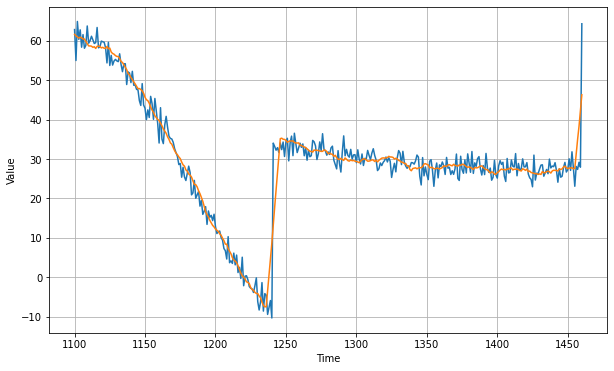

In [119]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

## Step 5.5: Evaluate Forecast

In [120]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

10.299859
2.1035829


In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

#AR Model
# <hr>
Auto Regression

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
df = pd.read_csv("sunspots.csv", parse_dates=["Date"], index_col="Date")
series = df["Monthly Mean Total Sunspot Number"].asfreq("1M")
series.head()

In [ ]:
series.plot(figsize=(12, 5))

In [ ]:
series["1995-01-01":].plot()

In [ ]:
series.diff(1).plot()
plt.axis([0, 100, -50, 50])

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(serie

In [ ]:
autocorrelation_plot(series.diff(1)[1:])

In [ ]:
autocorrelation_plot(series.diff(1)[1:].diff(11 * 12)[11*12+1:])
plt.axis([0, 500, -0.1, 0.1])

In [ ]:
autocorrelation_plot(series.diff(1)[1:])
plt.axis([0, 50, -0.1, 0.1])

In [ ]:
116.7 - 104.3

In [ ]:
[series.autocorr(lag) for lag in range(1, 50)]

In [ ]:
pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
Read a comma-separated values (csv) file into DataFrame.


In [ ]:
from pandas.plotting import autocorrelation_plot

series_diff = series
for lag in range(50):
  series_diff = series_diff[1:] - series_diff[:-1]

autocorrelation_plot(series_diff)

In [ ]:
import pandas as pd

series_diff1 = pd.Series(series[1:] - series[:-1])
autocorrs = [series_diff1.autocorr(lag) for lag in range(1, 60)]
plt.plot(autocorrs)
plt.show()